In [1]:
!pip install livelossplot -q

# Import the necessary libraries

In [2]:
import glob, os, cv2, numpy as np, matplotlib.pyplot as plt
import tensorflow as tf
from livelossplot import PlotLossesKeras

2024-03-19 11:26:05.079372: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 11:26:05.079471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 11:26:05.224620: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Seperating the dataset into different categories

In [3]:
images_folds=glob.glob("/kaggle/input/keralaleavesdataset/Datatset/*")

In [4]:
grapes_folds=glob.glob("/kaggle/input/keralaleavesdataset/Datatset/Grape*")
pepper_bell_folds=glob.glob("/kaggle/input/keralaleavesdataset/Datatset/Pepper*")
potato_folds=glob.glob("/kaggle/input/keralaleavesdataset/Datatset/Potato*")
tomato_folds=glob.glob("/kaggle/input/keralaleavesdataset/Datatset/Tomato*")
jackfruit_folds=glob.glob("/kaggle/input/keralaleavesdataset/Datatset/jackfruit*")
mango_folds=glob.glob("/kaggle/input/keralaleavesdataset/Datatset/mango*")

In [5]:
healthy_folds=glob.glob("/kaggle/input/keralaleavesdataset/Datatset/*__healthy*")
disease_folds=[i for i in images_folds if i not in healthy_folds]

# Displaying an example

In [6]:
def plot_four(fold):
    imgs=glob.glob(fold+"/*.JPG")[:4]
    
    for i,img in enumerate(imgs):
        image=cv2.imread(img)
        
        plt.subplot(2,2,i+1)
        plt.imshow(image)
        plt.title(os.path.basename(fold))
        plt.axis("off")
    
    plt.show()
        
        

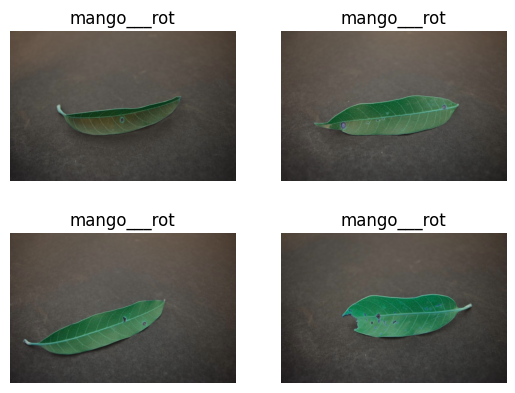

In [7]:
plot_four(disease_folds[1])

# Creating an autoencoder model

In [33]:
input_shape = (256, 256, 3)
inputs = tf.keras.layers.Input(shape=input_shape)

# Encoder
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = tf.keras.models.Model(inputs, decoded)




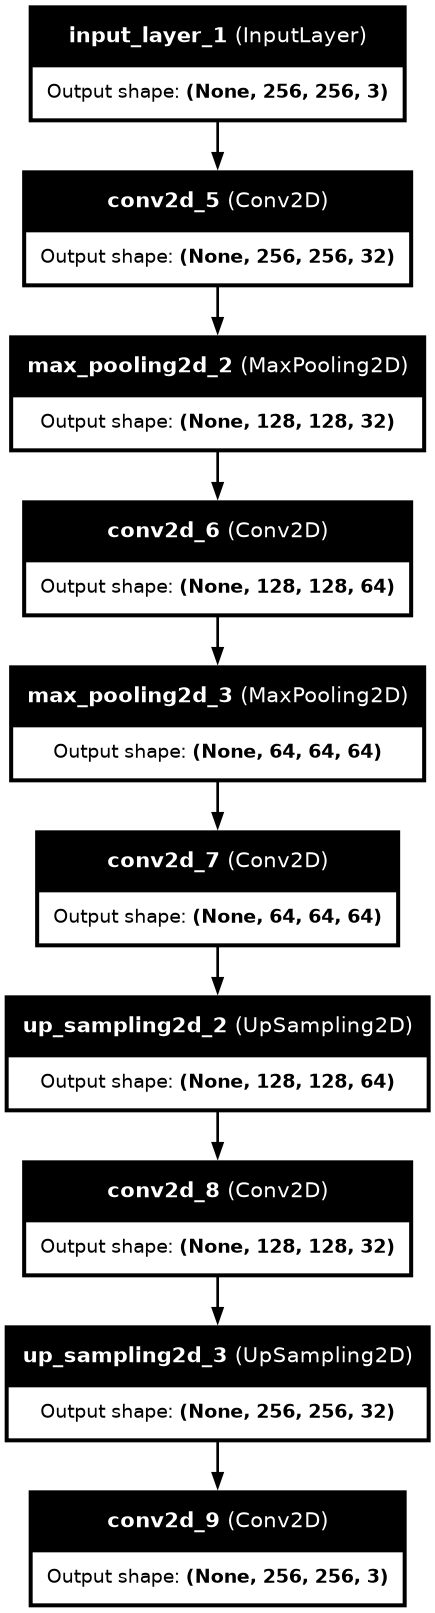

In [34]:
tf.keras.utils.plot_model(
    autoencoder,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

In [35]:
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 256, 256, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
def SSIMLoss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

In [37]:
autoencoder.compile(loss=SSIMLoss,optimizer="adam")

In [38]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, files,batch_size):
        self.files = files
        self.batch_size = batch_size


    def __len__(self):
        return int(np.floor(len(self.files) / self.batch_size))

    def __getitem__(self, index):
        x_imgs=[]
        y_imgs=[]
        for seq in range(index*self.batch_size,(index+1)*self.batch_size):
            x=cv2.imread(self.files[seq])
            x=cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
            x=cv2.resize(x, (256,256),interpolation = cv2.INTER_LINEAR)/255.0
            
            x_imgs.append(x)
            y_imgs.append(x)
        x_imgs=np.array(x_imgs)
        y_imgs=np.array(y_imgs)
        
        return (x_imgs,y_imgs)
        

In [39]:
jfh_path="/kaggle/input/keralaleavesdataset/Datatset/jackfruit___healthy"
jfh=glob.glob(jfh_path+"/*.jpg")

In [40]:
traingen=DataGenerator(jfh[:350],batch_size=32)
valgen=DataGenerator(jfh[350:],batch_size=32)

In [42]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/kaggle/working/autoenc.keras",
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Training the autoencoder model on helathy jackfruit leaves

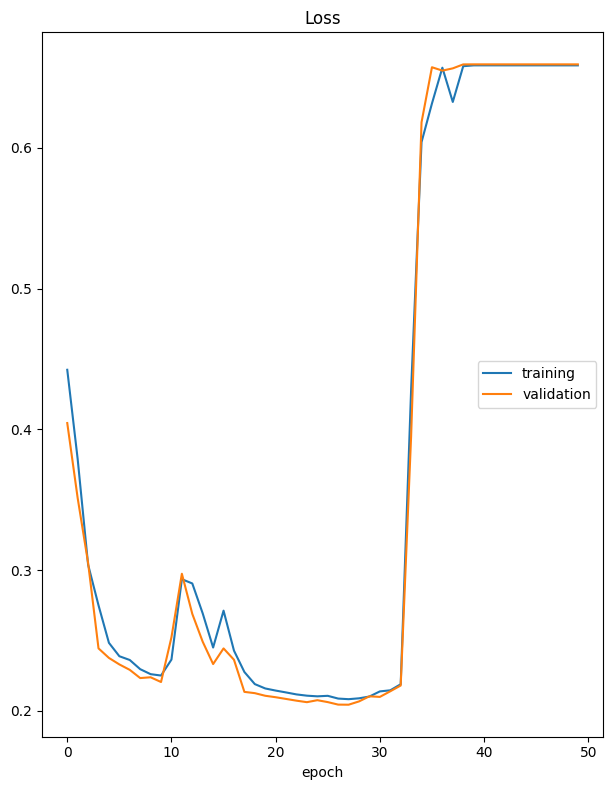

Loss
	training         	 (min:    0.208, max:    0.659, cur:    0.659)
	validation       	 (min:    0.204, max:    0.659, cur:    0.659)
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 286ms/step - loss: 0.6598 - val_loss: 0.6593


In [44]:
autoencoder.fit(traingen,epochs=50,callbacks=[PlotLossesKeras(),model_checkpoint_callback],validation_data=valgen)

In [109]:
autoencoder=tf.keras.models.load_model("/kaggle/working/autoenc.keras",custom_objects={"SSIMLoss":SSIMLoss})

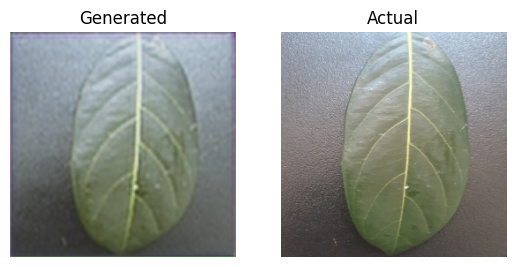

In [110]:
pr=autoencoder.predict(valgen[0][0],verbose=0)[0]
plt.subplot(1,2,1)
plt.imshow(pr)
plt.title("Generated")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(valgen[0][0][0])
plt.title("Actual")
plt.axis("off")
plt.show()

# Taking the necoder part and using it for classififcation of jackfruit leaves

In [111]:
disc_model=tf.keras.models.Model(inputs=autoencoder.input,outputs=autoencoder.get_layer("conv2d_7").output)

In [112]:
inps=tf.keras.layers.Flatten()(disc_model.output)
x=tf.keras.layers.Dense(64,activation="relu")(inps)
x=tf.keras.layers.Dense(64,activation="relu")(x)
x=tf.keras.layers.Dense(2,activation="softmax")(x)

class_model=tf.keras.models.Model(inputs=disc_model.input,outputs=x)
class_model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │    16,777,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,837,890 (64.23 MB)

 Trainable params: 16,837,890 (64.23 MB)

 Non-trainable params: 0 (0.00 B)

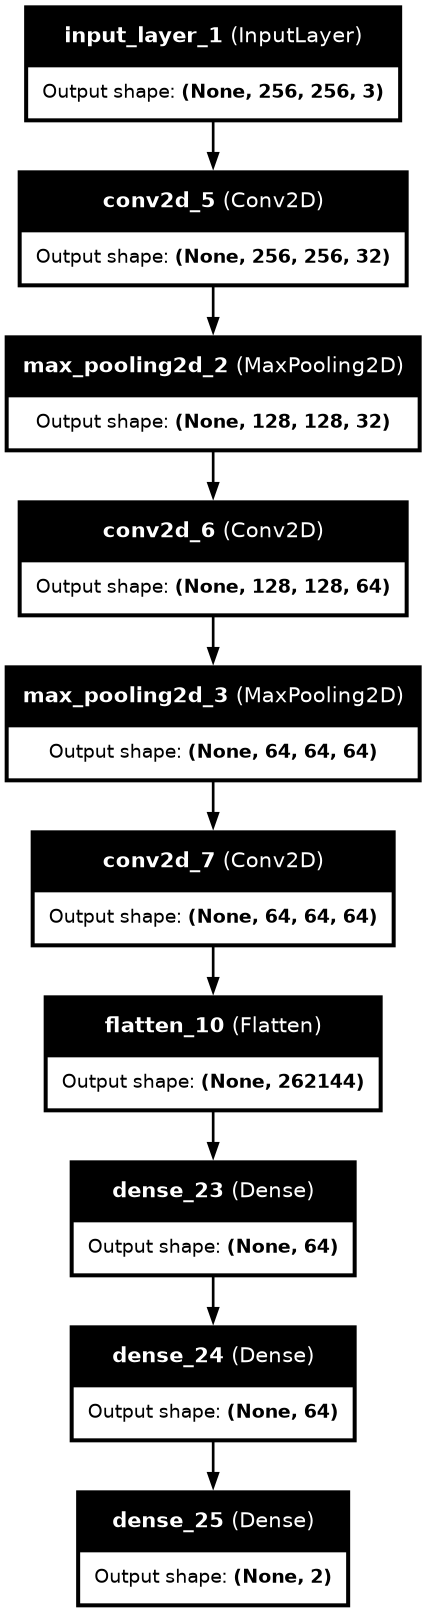

In [113]:
tf.keras.utils.plot_model(
    class_model,
    to_file='class_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

In [114]:
class_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [115]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/keralaleavesdataset/Datatset',
        target_size=(256,256),
        batch_size=32,
        class_mode='sparse',
        subset="training",
        classes=["jackfruit___healthy","jackfruit___bacterial spot"])
validation_generator = train_datagen.flow_from_directory(
        '/kaggle/input/keralaleavesdataset/Datatset',
        target_size=(256, 256),
        batch_size=32,
        class_mode='sparse',
        subset="validation",
        classes=["jackfruit___healthy","jackfruit___bacterial spot"])

Found 538 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [116]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/kaggle/working/class_model.keras",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Training classification model

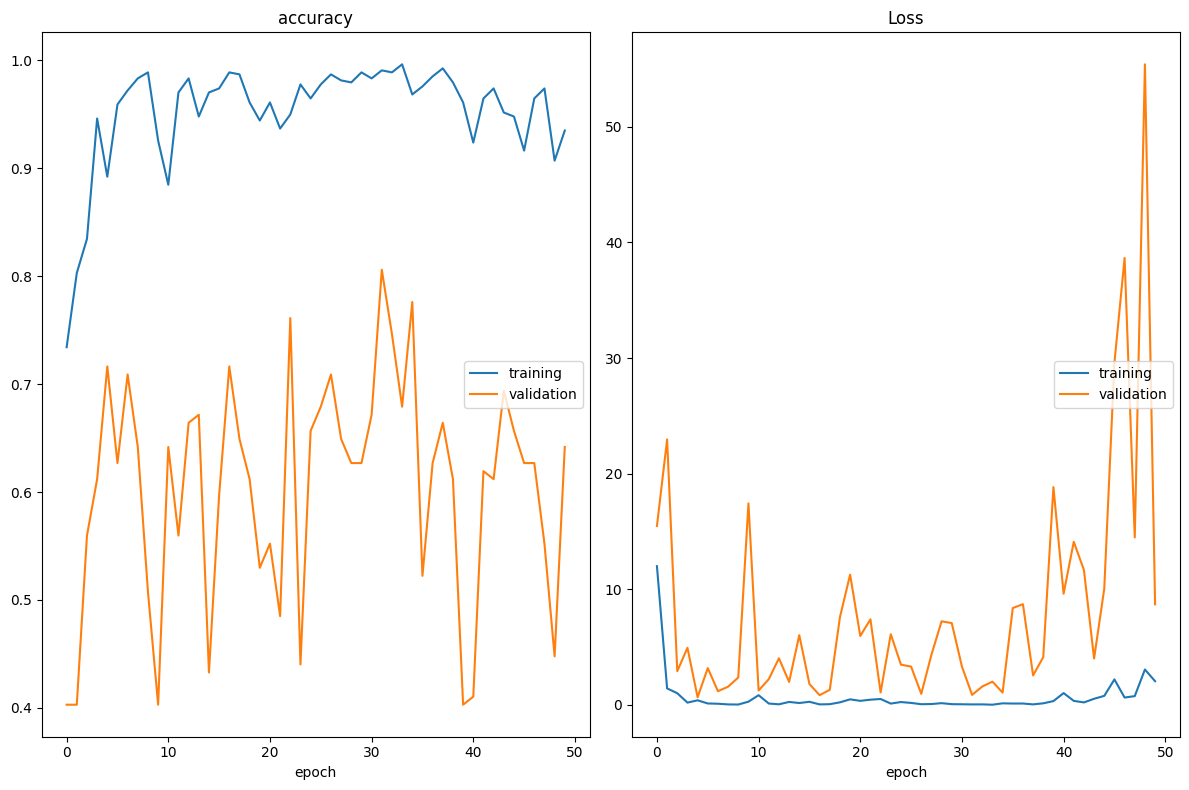

accuracy
	training         	 (min:    0.734, max:    0.996, cur:    0.935)
	validation       	 (min:    0.403, max:    0.806, cur:    0.642)
Loss
	training         	 (min:    0.014, max:   11.996, cur:    2.046)
	validation       	 (min:    0.653, max:   55.408, cur:    8.696)
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 574ms/step - accuracy: 0.9358 - loss: 2.1439 - val_accuracy: 0.6418 - val_loss: 8.6961


In [117]:
class_model.fit(train_generator,epochs=50,callbacks=[PlotLossesKeras(),model_checkpoint_callback],validation_data=validation_generator)

In [120]:
class_model=tf.keras.models.load_model("/kaggle/working/class_model.keras")
class_model.evaluate(validation_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 525ms/step - accuracy: 0.7437 - loss: 1.0757


[1.3521322011947632, 0.7388059496879578]